In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import os
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers, datasets

$ y = w^{T}x +b = \begin{bmatrix} w_{1}, w_{2}, ..., w_{n} \end{bmatrix} \cdot \begin{bmatrix} x_{1}\\x_{2}\\ \vdots \\ x_{n} \end{bmatrix} + b $

In [3]:
(x, y), (x_val, y_val) = datasets.mnist.load_data()
x.shape, y.shape

((60000, 28, 28), (60000,))

In [4]:
x = 2 * tf.convert_to_tensor(x, dtype=tf.float32) / 255. - 1

In [5]:
y = tf.convert_to_tensor(y, dtype=tf.int32)

In [6]:
print(y)
y = tf.one_hot(y, depth=10)
y

tf.Tensor([5 0 4 ... 5 6 8], shape=(60000,), dtype=int32)


<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [7]:
y.shape

TensorShape([60000, 10])

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
train_dataset = train_dataset.batch(512)

In [10]:
model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [27]:
optimizer = keras.optimizers.Adam(0.01)

l = []
@tf.function
def train_step():
    with tf.GradientTape() as tape:
        x = tf.reshape(x, (-1, 28 * 28))
        out = model(x)
        loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]    
        l.append(loss.numpy())
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

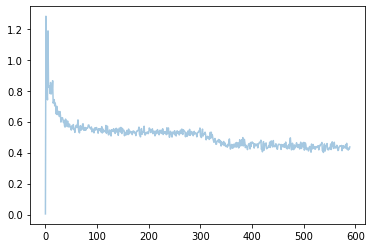

In [28]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(range(len(l)), l, '-')